In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.plotly as py
from scipy import stats
import seaborn as sns
import cufflinks as cf
from ipywidgets import interact
import plotly.tools as tls
cf.go_offline()

In [24]:
df=pd.read_csv('../train.csv')
df.shape

(1460, 81)

In [25]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


# PART 1: Explore data and understand what the fields mean. 
## Part 1.1 There are 6965  rows with Nan value. Cleaning

Dropped all the columns, where the exist ANY NaN value:
'Alley','MasVnrType','MasVnrArea', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1','Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual','GarageCond', 'PoolQC','Fence', 'MiscFeature'.

Total 19 dropped in the dataframe : 62 remained out of 81 columns.
Normally, I had to "Remove columns with high proportion of missing values." But due to reduced time, I don't dare to explore those columns yet. Maybe sometimes later. There are still 62 columns to explore and to use.

I also, played with df.dropna(thresh=2), thresh was set from 80 to 70, then decreasing to 70. Row number of 1460 remained unchanged - maybe a bug

In [33]:
df=df.dropna(axis=1, how='any')

In [34]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [35]:
df_dropped.shape

(1460, 62)

In [40]:
df.isnull().sum().sum()# Check that now the table contains 0 NaN value

0

## Part 1.2 - Explore "SalePrice" Column

In [41]:
df.SalePrice.describe() 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

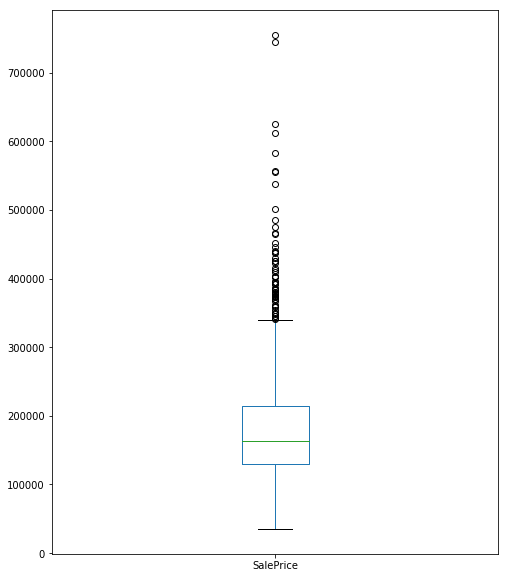

In [42]:
df.SalePrice.plot.box(figsize=(8,10))

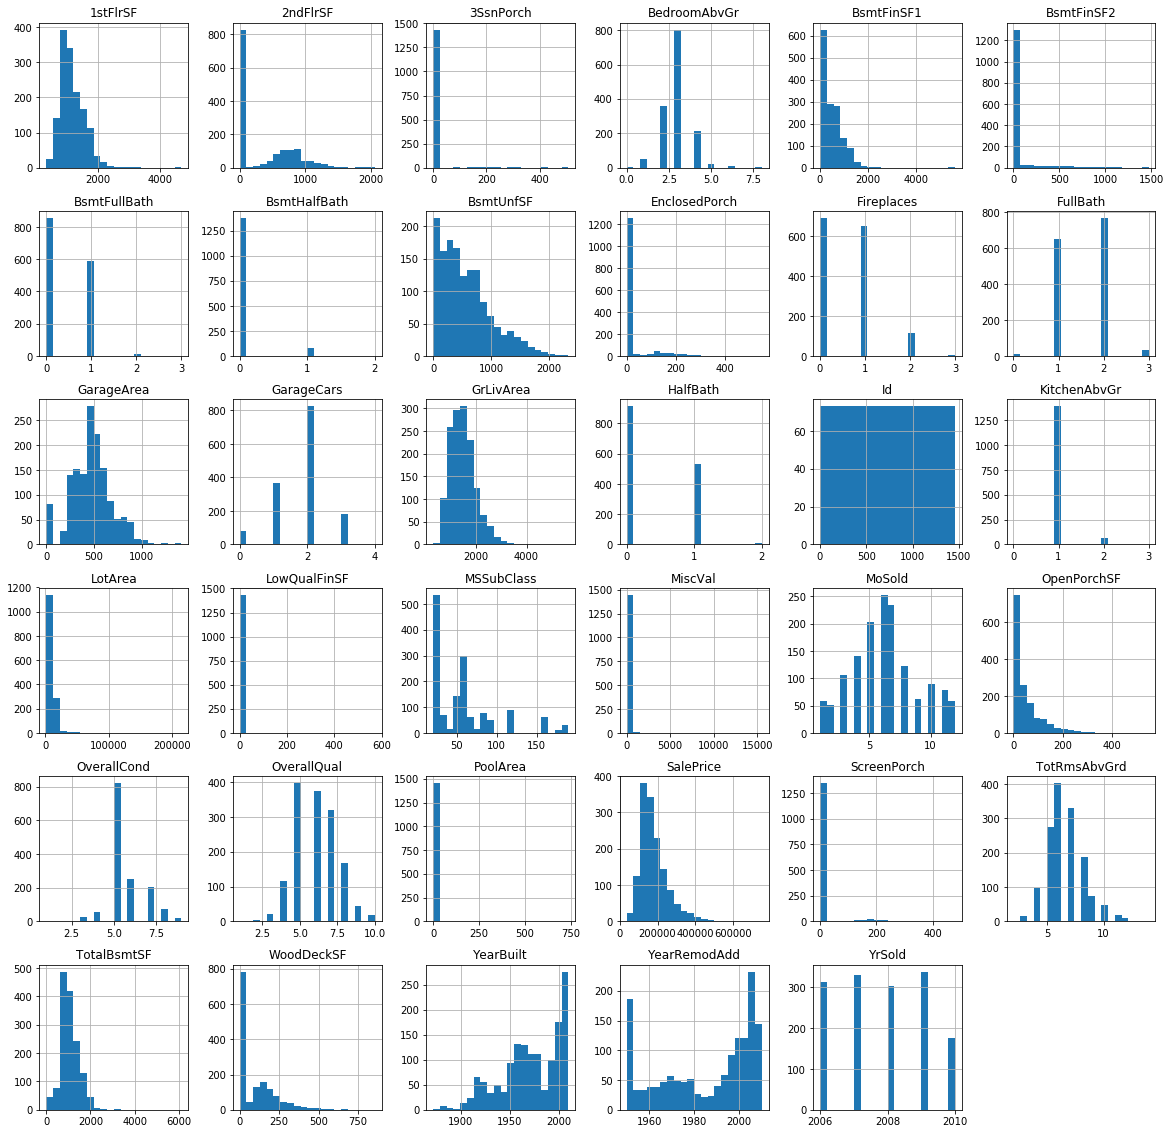

In [43]:
df.hist(bins=20, figsize=(20,20))
plt.show()
# Part 1.3 Have a visual support to understand other columns for my further exploratory analysis

## Part 1. 4 - Visual representation of 'Building Type' column. 

In [44]:
df.BldgType.value_counts()
# Part 1. 4 - Visual representation of Building Type column. Out of 1460 rows there are:

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [45]:
sizes=df.BldgType.value_counts()
labels = ['Single-family Detached', 'Townhouse End Unit', 'Duplex', 'Townhouse Inside Unit', 'Two-family Conversion']

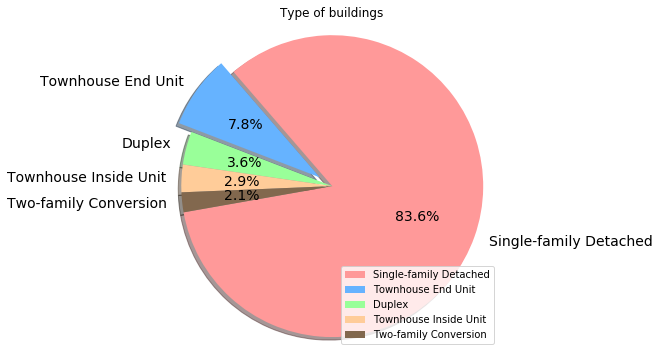

In [46]:
explode = (0, 0.1, 0,0,0)
fig1, ax1 = plt.subplots(figsize=[6, 6])
plt.title('Type of buildings')
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#82684E']
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=190, colors=colors, explode=explode, textprops={'fontsize': 14})
ax1.axis('equal')

plt.legend(labels,loc=4)
plt.show()

## Part 1.4 - Conclusion
## 83.6 % of Data concerns "Single-Family Detached" type of buildings. 
## Well, lets reduce the scope and explore further the data which is > 80% of entire Dataset

In [47]:
df=df[df['BldgType']=='1Fam']
df.shape
# There 1220 rows (83.6 %) Single Family Detached buildings sold.
# the dataframe now contains only this type of buildings.

(1220, 62)

'''
Checking the SalePrice in the original dataframe before filtering to 1 type of buildings. 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
  
  
  to the dataframe with single family buildings only :
count    1220.000000  
mean     185763.807377
std      82648.502922 
min      34900.000000 
25%      131475.000000
50%      167900.000000
75%      222000.000000
max      755000.000000
Name: SalePrice, dtype: float64

mean Before= 180921.19 vs After Filtering = 185763.80. Delta is 4842.61. Which is 2.7 % increase of the mean value,
while 16.4 % of data dropped off.

'''

## Part 1.5 - MSZoning column exploration. How the price of the Sales depends on the classification of the zone

MSZoning: Identifies the general zoning classification of the sale.
       C	Commercial.
       FV	Floating Village Residential. 
       RH	Residential High Density.
       RL	Residential Low Density.
       RM	Residential Medium Density.

In [88]:
ZonesTable=df.groupby('MSZoning', as_index=True)['SalePrice'].agg(Minimum=np.min, Maximum=np.max, Average=np.mean).sort_values(by='Average')

In [89]:
ZonesTable

,Minimum,Maximum,Average
MSZoning,,,
C (all),34900,108000,67931.111111
RH,76000,159434,110770.444444
RM,37900,475000,125436.899281
RL,39300,755000,193592.266341
FV,176000,370878,240940.236842


In [90]:
ZonesTable.iplot(kind='bar', xTitle='Zoning Classification', yTitle='Sale Price', 
           title='Minimum, Maximum and Average Prices by Zone Classification', filename='bar-direct-labels')

## Part 1.6 - Neighborhood

In [93]:
df.groupby('Neighborhood')['MSZoning'].value_counts().sort_values(ascending=False)

Neighborhood  MSZoning
NAmes         RL          205
CollgCr       RL          140
OldTown       RM           83
Gilbert       RL           78
Edwards       RL           78
NWAmes        RL           71
Sawyer        RL           67
NridgHt       RL           55
Crawfor       RL           45
SawyerW       RL           43
NoRidge       RL           41
Somerst       FV           38
Timber        RL           37
Mitchel       RL           36
BrkSide       RM           30
ClearCr       RL           28
BrkSide       RL           26
IDOTRR        RM           25
Somerst       RL           21
SWISU         RL           19
OldTown       RL           13
StoneBr       RL           13
IDOTRR        C (all)       9
Veenker       RL            8
SawyerW       RH            4
SWISU         RH            3
Edwards       RH            2
              RM            1
Blmngtn       RL            1
Name: MSZoning, dtype: int64

In [86]:
NeighbTable=df.groupby('Neighborhood', as_index=True)['SalePrice'].agg(Minimum=np.min, Maximum=np.max, Average=np.mean).sort_values(by='Average')

In [87]:
NeighbTable.iplot(kind='bar', xTitle='Neighborhood Impact', yTitle='Sale Price', 
           title='Minimum, Maximum and Average Prices by Neighborhood', filename='bar-direct-labels')

In [137]:
df.dtypes

Id               int64  
MSSubClass       int64  
MSZoning         object 
LotFrontage      float64
LotArea          int64  
                 ...    
MoSold           int64  
YrSold           int64  
SaleType         object 
SaleCondition    object 
SalePrice        int64  
Length: 81, dtype: object

In [27]:
df.OverallCond.unique()

array([5, 8, 6, 7, 4, 2, 3, 9, 1], dtype=int64)

In [128]:
df.MSSubClass.unique()

array([ 60,  20,  70,  50,  45,  30,  85,  80,  75,  40, 120], dtype=int64)

In [50]:
# df.plot(df['OverallCond'], df['SalePrice'])

In [129]:
df.Condition1.unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRAn', 'PosA', 'RRNe',
       'RRNn'], dtype=object)

In [145]:
df.select_dtypes(include=['float64', 'int64']).head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500


In [165]:
plt.figure(figsize=(20, 10), dpi=200)
# plt.hist( x, df['SalePrice'])

<Figure size 4000x2000 with 0 Axes>

<Figure size 4000x2000 with 0 Axes>

In [ ]:

'''
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
       '''

In [ ]:
reduced_df=df.drop(['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath','KitchenAbvGr', 'KitchenQual','TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'SaleType',
       'SaleCondition'])